## 摘自簡報說明：
#題目: 將Kaggle Dataset SMS文件以機器學習方式分辨是否為垃圾郵件
#說明：輸入文件spam.csv是一個至少有兩欄v1和v2的csv檔，v1註明該簡訊是ham還是spam，v2是sms內容本身，
#我們在讀入後先去掉不必要的欄位內容，將欄位名稱改為labels和data，再將labels內容改成0/1，0
#代表ham1代表spam。接著將內容切割成訓練集和測試集，再用tokenizer做前處理，最後形成可以分析的格式。
#建模分析之後我們印出訓練和測試準確度，然後以word cloud畫出spam和ham常用的字，
#再分別印出判斷錯誤的SMS供未來改進。
#延伸:可用不同的tokenizer，不同的ML分類器做改進準確率的比較。
#範例程式檔名: spam_sms_垃圾簡訊偵測器.py，以Naïve Bayes (MultinomialNB) 方式完成
#模組: sklearn, pandas, numpy, wordcloud
#輸入檔：spam.csv
#成績：辨識百分率
## 進一步說明：
#在這個習題中，我們從Kaggle下載SMS簡訊資料，經由前處理之後判斷是否為SPAM
#並畫出垃圾字雲來


### 以下是本習題要做的:

# 1.前處理：
###    刪除不必要的欄位
###    重新命名欄位
###    二元數位化標記(labels)
###    分為訓練與測試組

# 2.特徵：可選用 Count or TF-IDF
# 3.建模，訓練，印出
# 4.列出判斷錯的 



In [3]:
!pip install builtins

ERROR: Could not find a version that satisfies the requirement builtins
ERROR: No matching distribution found for builtins


In [6]:
from __future__ import print_function, division
from future.utils import iteritems
#from builtins import ran

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [7]:
# 資料來自：
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [8]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
# 刪除不必要的欄位
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [11]:
# 重新命名欄位
df.columns = ['labels', 'data']

In [12]:
# 二元數位化標記(labels)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [13]:
df.head(5)

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
df.shape

(5572, 3)

In [15]:
# 分為訓練與測試組
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)
print(df_train.shape, df_test.shape, Ytrain.shape, Ytest.shape)

(3733,) (1839,) (3733,) (1839,)


In [16]:
# 方法1:以TF-IDF 為特徵
#tfidf = TfidfVectorizer(decode_error='ignore')
#Xtrain = tfidf.fit_transform(df_train)
#Xtest = tfidf.transform(df_test)

# 方法2:以數量為特徵
count_vectorizer = CountVectorizer(decode_error='ignore')
Xtrain = count_vectorizer.fit_transform(df_train)
Xtest = count_vectorizer.transform(df_test)

In [17]:
# 產生模型，訓練，印出
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.995178140905438
test score: 0.9831430125067971


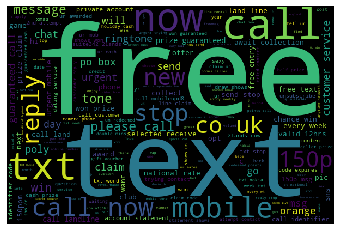

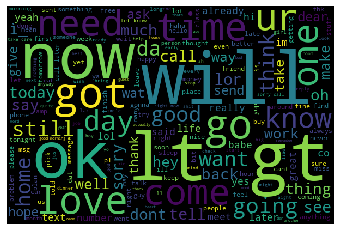

In [18]:
# 以wordcloud visualize 數據
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')

In [20]:
# 找出判斷錯誤的地方
#X = tfidf.transform(df['data'])
X = count_vectorizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [21]:
# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for i, msg in enumerate(sneaky_spam):
    print('>>> ', i, msg)

>>>  0 FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
>>>  1 Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
>>>  2 SMS. ac sun0819 posts HELLO:\You seem cool
>>>  3 Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
>>>  4 Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
>>>  5 Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
>>>  6 For sale - arsenal dartboard. Good condition but no doubles or trebles!
>>>  7 CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
>>>  8 Hi its LUCY Hubby at meetins all day Fri & I will B

In [23]:
# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for i, msg in enumerate(not_actually_spam):
    print('>>> ', i, msg)

>>>  0 No calls..messages..missed calls
>>>  1 No calls..messages..missed calls
>>>  2 Waiting for your call.
>>>  3 We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
>>>  4 Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
>>>  5 No calls..messages..missed calls
>>>  6 Unlimited texts. Limited minutes.
>>>  7 Mathews or tait or edwards or anderson
>>>  8 Gettin rdy to ship comp
>>>  9 Have you laid your airtel line to rest?
>>>  10 I liked the new mobile
>>>  11 Anytime...
>>>  12 Nokia phone is lovly..
>>>  13 We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
